## Support Vector Machines (SVM)

Import Modules

In [1]:
# Import Modules and functions
# ----------------------------
from Functions import *
from Modules   import *

Read DataFrame

In [6]:
df    = pd.read_csv('..\\Data\\data_train.csv')
X_aim = pd.read_csv('..\\Data\\features_aim.csv')
# --- Clean and prepare data and Aim -----

X_train, X_test, y_train, y_test, X_aim = CLEAN_All_DATA(df, X_aim)

#### SVM Pipeline and GridSearchCV

In [7]:
# Support Vector Machines 

preprocessor = ColumnTransformer([
                                  ('num', StandardScaler(), num_cols),
                                  ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                                ])


svm_classifier = SVC(class_weight = 'balanced',
                     random_state = 42, 
                     )


pipeline_svm = Pipeline([
                        ('preprocessor' , preprocessor),
                        ('svmClassifier', svm_classifier)
                       ])


param_grid = {
             'svmClassifier__C'     : [2.25, 2.3, 2.35],
            #'svmClassifier__kernel': ['rbf'  , 'poly'],
            #'svmClassifier__gamma' : ['scale', 'auto']
             }

model_svm_grid = GridSearchCV(pipeline_svm, 
                               param_grid   = param_grid, 
                               scoring      = 'f1', 
                               cv           = 3,  
                               n_jobs       = 8
                              )

Fit and Scores

In [8]:
# Fit and predict  
# ---> .sample(6000, random_state = 42) to test a smaller sample for faster pre-results

model_svm_grid.fit(X_train.sample(10000, random_state = 42), y_train.sample(10000, random_state = 42))  
optimised_svm_grid   = model_svm_grid.best_estimator_
optimised_svm_params = model_svm_grid.best_params_

predictions_svm_grid = model_svm_grid.predict(X_test)
# Model evaluation
f1_svm_grid          = f1_score(y_test       , predictions_svm_grid)
recall_svm_grid      = recall_score(y_test   , predictions_svm_grid)
accuracy_svm_grid    = accuracy_score(y_test , predictions_svm_grid)
precision_vm_grid    = precision_score(y_test, predictions_svm_grid)


grid_svm_metrics     = pd.DataFrame({
                                    'Model'    : ['GridSearch Optimised SVM'],
                                    'F1 Score' : [f1_svm_grid],
                                    'Recall'   : [recall_svm_grid],
                                    'Precision': [accuracy_svm_grid],
                                    'Accuracy' : [precision_vm_grid]
                                    })

Optimised model and hyperparameters

In [9]:

# Print Results
print("Optimised SVM Model :", optimised_svm_grid, '\n\n')
print('-- '*30)
print("Optimised SVM Parameters:", optimised_svm_params)

Optimised SVM Model : Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice',
                                                   'MMRCurrentAuctionAveragePrice',
                                                   'MMRCurrentAuctionCleanPrice',
                                                   'MMRCurrentRetailAveragePrice',
                                                   'MMRCurrentRetailCleanPrice',
                                                   'V...
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                

Scores

Scoring of Logistic Regression Classifier


Model,F1 Score,Recall,Precision,Accuracy
GridSearch Optimised SVM,0.375269,0.412530,0.822920,0.344181


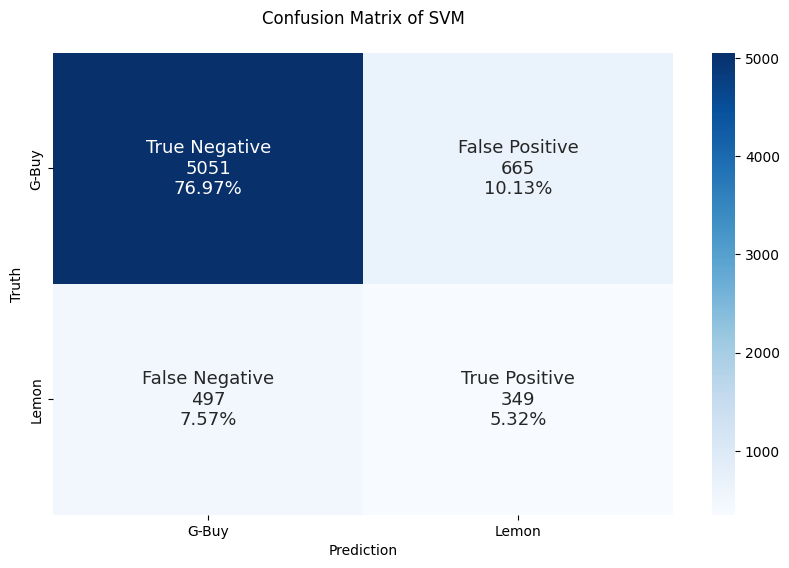

In [10]:
print('Scoring of Logistic Regression Classifier')
display(grid_svm_metrics.style.hide())
Confusion_Matrix_Func(y_test, predictions_svm_grid, 'SVM')

Save the optimised model

In [11]:
# Save the model as it is quite demanding

directory_path = r"D:\Visual Studio Code\Used Cars Sales\Pickle"
filename = "Optimised_GridSearch_SVM.p"

pickle.dump(optimised_svm_grid, open(directory_path + "\\" + filename, "wb"))